# Breast cancer relapse clustering

Author: Hank Feild  
Date: 2025-01-09

Explores clustering on the breast cancer GEO dataset. This is not a particularly interesting analysis, but it does take you through some of the core steps.

[Here's a blog post](https://dmnfarrell.github.io/bioinformatics/wgs-snp-clustering) with some Python code for performing SNP clustering using different modules than I'm using here and may be a more relatable example.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt # For plotting results
import seaborn as sns # For plotting results
from sklearn.preprocessing import MinMaxScaler # For scaling
import sklearn.cluster # For clustering
from scipy.cluster.hierarchy import dendrogram, linkage # For agglomerative clustering
import random # For sampling

## Cluster patients by genes

We'll use the transposed, scaled gene dataset here. This assumes we've run the breast-cancer-geo-cleaning notebook.

In [4]:
genesT = pd.read_table('../data/breast-cancer-relapse-geo/GSE2034_genes_transposed_cleaned_scaled.tsv.gz')
genesT.head()

,geoId,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-Hs18SrRNA-3_s_at,AFFX-r2-Hs18SrRNA-5_at,AFFX-r2-Hs18SrRNA-M_x_at,AFFX-r2-Hs28SrRNA-3_at,AFFX-r2-Hs28SrRNA-5_at,AFFX-r2-Hs28SrRNA-M_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at
0,GSM36777,0.392454,0.258227,0.045583,0.218682,0.135484,0.157570,0.283205,0.024671,0.029581,...,0.079776,0.080168,0.143762,0.345904,0.230652,0.366146,0.274844,0.329105,0.135056,0.113171
1,GSM36778,0.715050,0.118942,0.037561,0.789936,0.748387,0.325855,0.527911,0.092105,0.043384,...,0.261647,0.203904,0.119804,0.144038,0.257473,0.129248,0.224366,0.359749,0.296577,0.261227
2,GSM36779,0.565966,0.197798,0.065069,0.321879,0.193011,0.161588,0.299086,0.207648,0.009090,...,0.306918,0.301633,0.456615,1.000000,0.859880,0.812202,0.738961,0.625323,0.348631,0.360995
3,GSM36780,0.416062,0.461410,0.079770,0.269216,0.546237,0.168955,0.309673,0.148849,0.087855,...,0.181258,0.177624,0.195195,0.207614,0.237080,0.358438,0.349493,0.407453,0.356604,0.321634
4,GSM36781,0.442603,0.484145,0.084831,0.236715,0.336559,0.225675,0.305101,0.065378,0.357606,...,0.163300,0.198094,0.042042,0.001744,0.033312,0.071906,0.114995,0.065103,0.318590,0.262476


1 521.7635556080436
2 492.908371442582
3 478.6716454855814
4 467.2494527353306
5 461.22566162477546
6 452.9633772296895
7 450.22239656020264
8 443.8156262719648
9 439.26587895597953
10 438.4828752896565
20 406.70408617812046
30 385.3633649253568
60 322.64975022540074
120 211.69628513493848
240 44.63383063529252


Text(0, 0.5, 'MSE')

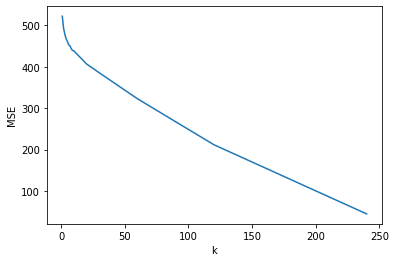

In [21]:
# ks = list(range(1, 250, 20))
ks = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 60, 120, 240]
meanSquaredErrors = [] 
for k in ks:
    # Grabs the sum of squared errors (SSE) of all the points to their closest cluster (*.inertia_),
    # and divides by the number of points to get MSE.
    meanSquaredErrors.append(
        sklearn.cluster.KMeans(n_clusters=k).fit(genesT.drop(columns='geoId')).inertia_/len(genesT)
    )
    print(k, meanSquaredErrors[-1])

plt.plot(ks, meanSquaredErrors)
plt.xlabel('k')
plt.ylabel('MSE')


In [5]:
# Sample 100 features:
sampledFeatures = random.sample(list(genesT.drop(columns=['geoId']).columns), k=100)
sampledFeatures

genesTSubset = genesT[sampledFeatures].copy()

In [6]:
genesTSubset.head()

,217354_s_at,210381_s_at,211993_at,215135_at,206773_at,205537_s_at,212822_at,210535_at,211758_x_at,207912_s_at,...,204316_at,221071_at,220338_at,210051_at,210342_s_at,216958_s_at,205162_at,211731_x_at,220184_at,217288_at
0,0.097806,0.074267,0.127560,0.344595,0.517813,0.072289,0.313493,0.351942,0.632602,0.000831,...,0.303151,0.239605,0.105292,0.080444,0.010315,0.225728,0.439833,0.177889,0.005659,0.154111
1,0.177017,0.115661,0.308063,0.965861,0.400580,0.253012,0.041721,0.237055,0.462732,0.087282,...,0.380780,0.881254,0.235391,0.038835,0.025788,0.398867,0.272917,0.816474,0.032065,0.380108
2,0.213834,0.072487,0.177197,0.039474,0.446562,0.115663,0.085543,0.047735,0.413323,0.206983,...,0.334178,0.027837,0.059904,0.198138,0.029799,0.378540,0.189161,0.404322,0.030179,0.249138
3,0.416140,0.087429,0.106752,0.445590,0.110605,0.127711,0.488287,0.120146,0.273262,0.173732,...,0.202463,0.166314,0.098861,0.189221,0.786246,0.150384,0.300985,0.464453,0.008488,0.044806
4,0.257717,0.125771,0.095968,0.633713,0.368268,0.173494,0.215588,0.074434,0.180950,0.129676,...,0.198358,0.156448,0.312018,0.025758,0.120344,0.293487,0.152583,0.371751,0.059101,0.339242


1 2.506132857630232
11 2.0343807458540515
21 1.8846056292248141
31 1.7650054793622316
41 1.640417336111897
51 1.5562187498158524
61 1.450571242335811
71 1.3475506515330897
81 1.2560646086238503
91 1.1526306540392277


Text(0, 0.5, 'MSE')

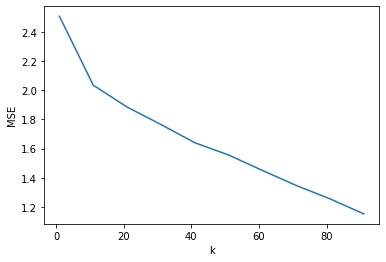

In [7]:
ks = list(range(1, 100, 10))
meanSquaredErrors = [] 
for k in ks:
    # Grabs the sum of squared errors (SSE) of all the points to their closest cluster (*.inertia_),
    # and divides by the number of points to get MSE.
    meanSquaredErrors.append(sklearn.cluster.KMeans(n_clusters=k).fit(genesTSubset).inertia_/len(genesTSubset))
    print(k, meanSquaredErrors[-1])

plt.plot(ks, meanSquaredErrors)
plt.xlabel('k')
plt.ylabel('MSE')


### Extracting labels

Once we find k, we can run k-means again with that k and get the labels. The labels are just the cluster number—each centroid gets a number between 1 and k. We can get the cluster number for each observation in our dataset from the k-means model using the `.labels_` data member. In the cell below, we're taking that list of labels and saving it to a new column in our data frame.

In [8]:
clustering = sklearn.cluster.KMeans(n_clusters=10).fit(genesTSubset)

genesTSubset['cluster'] = clustering.labels_
clustering.inertia_ # Reports the SSE across all observations relative to their assigned cluster's centroid.

588.3874890517064

In [9]:
clustering.labels_

array([1, 8, 1, 5, 4, 5, 5, 9, 6, 9, 9, 4, 7, 2, 9, 1, 8, 3, 6, 2, 4, 4,
       5, 6, 0, 1, 9, 1, 1, 7, 9, 9, 9, 6, 0, 0, 8, 0, 7, 4, 3, 5, 6, 0,
       5, 5, 6, 4, 5, 2, 4, 8, 4, 5, 7, 6, 4, 1, 4, 1, 1, 1, 1, 6, 6, 0,
       5, 5, 1, 4, 4, 7, 6, 0, 9, 6, 7, 5, 4, 7, 5, 1, 2, 4, 1, 4, 4, 6,
       4, 6, 1, 7, 2, 0, 1, 1, 1, 1, 3, 4, 5, 7, 0, 2, 7, 7, 5, 5, 2, 4,
       9, 2, 9, 9, 4, 0, 7, 5, 6, 5, 0, 5, 7, 3, 3, 2, 0, 1, 3, 4, 2, 1,
       2, 0, 1, 4, 8, 2, 2, 0, 0, 3, 0, 2, 1, 5, 4, 1, 6, 2, 3, 1, 2, 1,
       4, 9, 8, 2, 4, 5, 3, 5, 1, 4, 4, 0, 5, 0, 6, 6, 7, 1, 4, 7, 1, 3,
       0, 8, 0, 6, 2, 2, 3, 4, 9, 7, 9, 2, 2, 4, 1, 2, 4, 5, 0, 0, 5, 5,
       5, 0, 3, 5, 9, 5, 4, 6, 5, 6, 0, 1, 1, 2, 1, 1, 4, 1, 2, 2, 5, 0,
       0, 9, 1, 6, 1, 4, 4, 6, 7, 9, 6, 2, 9, 6, 6, 6, 9, 8, 5, 2, 4, 1,
       0, 0, 4, 4, 2, 5, 1, 6, 5, 1, 1, 1, 9, 7, 9, 4, 5, 5, 5, 1, 6, 4,
       2, 6, 4, 6, 4, 9, 4, 4, 9, 9, 4, 6, 3, 5, 2, 7, 0, 0, 2, 6, 5, 1],
      dtype=int32)

In [10]:
genesTSubset.head()

,217354_s_at,210381_s_at,211993_at,215135_at,206773_at,205537_s_at,212822_at,210535_at,211758_x_at,207912_s_at,...,221071_at,220338_at,210051_at,210342_s_at,216958_s_at,205162_at,211731_x_at,220184_at,217288_at,cluster
0,0.097806,0.074267,0.127560,0.344595,0.517813,0.072289,0.313493,0.351942,0.632602,0.000831,...,0.239605,0.105292,0.080444,0.010315,0.225728,0.439833,0.177889,0.005659,0.154111,1
1,0.177017,0.115661,0.308063,0.965861,0.400580,0.253012,0.041721,0.237055,0.462732,0.087282,...,0.881254,0.235391,0.038835,0.025788,0.398867,0.272917,0.816474,0.032065,0.380108,8
2,0.213834,0.072487,0.177197,0.039474,0.446562,0.115663,0.085543,0.047735,0.413323,0.206983,...,0.027837,0.059904,0.198138,0.029799,0.378540,0.189161,0.404322,0.030179,0.249138,1
3,0.416140,0.087429,0.106752,0.445590,0.110605,0.127711,0.488287,0.120146,0.273262,0.173732,...,0.166314,0.098861,0.189221,0.786246,0.150384,0.300985,0.464453,0.008488,0.044806,5
4,0.257717,0.125771,0.095968,0.633713,0.368268,0.173494,0.215588,0.074434,0.180950,0.129676,...,0.156448,0.312018,0.025758,0.120344,0.293487,0.152583,0.371751,0.059101,0.339242,4


## Visualizing clusters
Visualization can be difficult. When there are a relatively small number of features, we can plot pairs of features against each other using a scatterplot matrix ([see the seaborn version of this here](https://seaborn.pydata.org/examples/scatterplot_matrix.html)).

If you have lots of features, you may want to use dimensionality reduction to create a smaller set of features. You can use something like PCA to do this; [here's a notebook/blog post that takes you through an example](https://www.kaggle.com/code/minc33/visualizing-high-dimensional-clusters).

Here, I'm taking a lazy way out and just sampling a small number of features to plot.

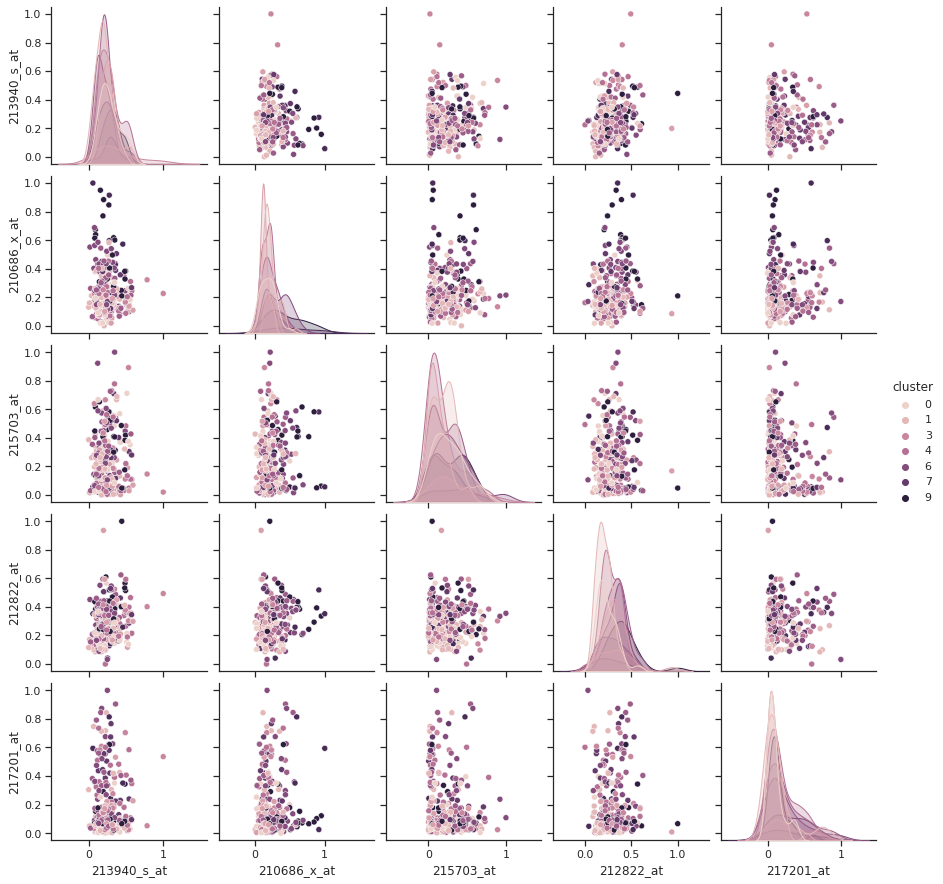

In [11]:
# Sample 5 features:
sampledFeatures = random.sample(list(genesTSubset.columns), k=5)
sampledFeatures

# Make a scatterplot matrix using those features.
sns.set_theme(style="ticks")
sns.pairplot(genesTSubset[sampledFeatures + ['cluster']], hue='cluster')

## Cluster genes by patients

In [5]:
genes = pd.read_table('../data/breast-cancer-relapse-geo/GSE2034_genes_cleaned_scaled.tsv.gz').sample(1000)
genes.head()

,ID_REF,GSM36777,GSM36778,GSM36779,GSM36780,GSM36781,GSM36782,GSM36783,GSM36784,GSM36785,...,GSM37053,GSM37054,GSM37055,GSM37056,GSM37057,GSM37058,GSM37059,GSM37060,GSM37061,GSM37062
13347,213969_x_at,0.501070,0.142555,0.469623,0.184212,0.291605,0.360362,0.503833,0.288397,0.382603,...,0.174341,0.109689,0.231038,0.300933,0.320459,0.322193,0.354333,0.398572,0.280309,0.348004
2351,202824_s_at,0.046152,0.036061,0.031221,0.015170,0.025255,0.032659,0.026419,0.020262,0.037713,...,0.030438,0.022941,0.013192,0.017626,0.033861,0.066642,0.029872,0.035183,0.022867,0.041326
731,201204_s_at,0.039263,0.048232,0.033968,0.015872,0.023809,0.034108,0.023496,0.021535,0.034548,...,0.020116,0.021622,0.035156,0.018661,0.016937,0.022597,0.033493,0.014777,0.026950,0.037472
13404,214026_s_at,0.000139,0.000175,0.000100,0.000041,0.000055,0.000069,0.000048,0.000122,0.000235,...,0.000093,0.000075,0.000440,0.000057,0.000301,0.000157,0.000066,0.000166,0.000186,0.000429
12286,212902_at,0.005101,0.003910,0.005841,0.005874,0.002259,0.004157,0.003218,0.002036,0.005714,...,0.001320,0.007315,0.003892,0.002250,0.004380,0.003462,0.002400,0.002026,0.004013,0.004540


1 0.9759719418977006
101 0.007133447595403735
201 0.0023690551816440307
301 0.0010051559043994236
401 0.00047328704279029434
501 0.00021298254548897806
601 9.62241128446449e-05
701 4.183082756975488e-05
801 1.5048317547257688e-05
901 2.935177372582856e-06


Text(0, 0.5, 'MSE')

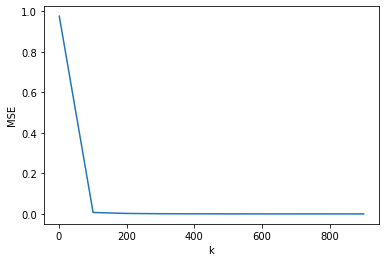

In [6]:

ks = list(range(1, 1000, 100))
meanSquaredErrors = [] 
for k in ks:
    # Grabs the sum of squared errors (SSE) of all the points to their closest cluster (*.inertia_),
    # and divides by the number of points to get MSE.
    meanSquaredErrors.append(sklearn.cluster.KMeans(n_clusters=k).fit(genes.drop(columns='ID_REF')).inertia_/len(genes))
    print(k, meanSquaredErrors[-1])

plt.plot(ks, meanSquaredErrors)
plt.xlabel('k')
plt.ylabel('MSE')

25 0.03286918123297116
50 0.016847859454902765
75 0.010220566678798407
100 0.007198079040792976
125 0.005279421778501508
150 0.0039001262746542298
175 0.0030359396370280953


Text(0, 0.5, 'MSE')

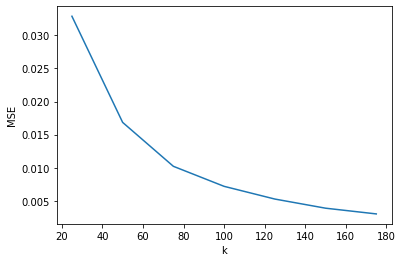

In [7]:
ks = list(range(25, 200, 25))
meanSquaredErrors = [] 
for k in ks:
    # Grabs the sum of squared errors (SSE) of all the points to their closest cluster (*.inertia_),
    # and divides by the number of points to get MSE.
    meanSquaredErrors.append(sklearn.cluster.KMeans(n_clusters=k).fit(genes.drop(columns='ID_REF')).inertia_/len(genes))
    print(k, meanSquaredErrors[-1])

plt.plot(ks, meanSquaredErrors)
plt.xlabel('k')
plt.ylabel('MSE')

### Extracting labels


In [8]:
clustering = sklearn.cluster.KMeans(n_clusters=60).fit(genes.drop(columns='ID_REF'))
genes['cluster'] = clustering.labels_
clustering.inertia_ # Reports the SSE across all observations relative to their assigned cluster's centroid.

13.44551640603529

In [9]:
genes[['ID_REF', 'GSM36777', 'cluster']].head()

,ID_REF,GSM36777,cluster
13347,213969_x_at,0.501070,27
2351,202824_s_at,0.046152,7
731,201204_s_at,0.039263,18
13404,214026_s_at,0.000139,58
12286,212902_at,0.005101,14


### Visualizing

In [10]:
# Sample 5 features:
sampledFeatures = random.sample(list(genes.drop(columns=['ID_REF', 'cluster']).columns), k=5)
sampledFeatures

['GSM36932', 'GSM37027', 'GSM36820', 'GSM36994', 'GSM36816']

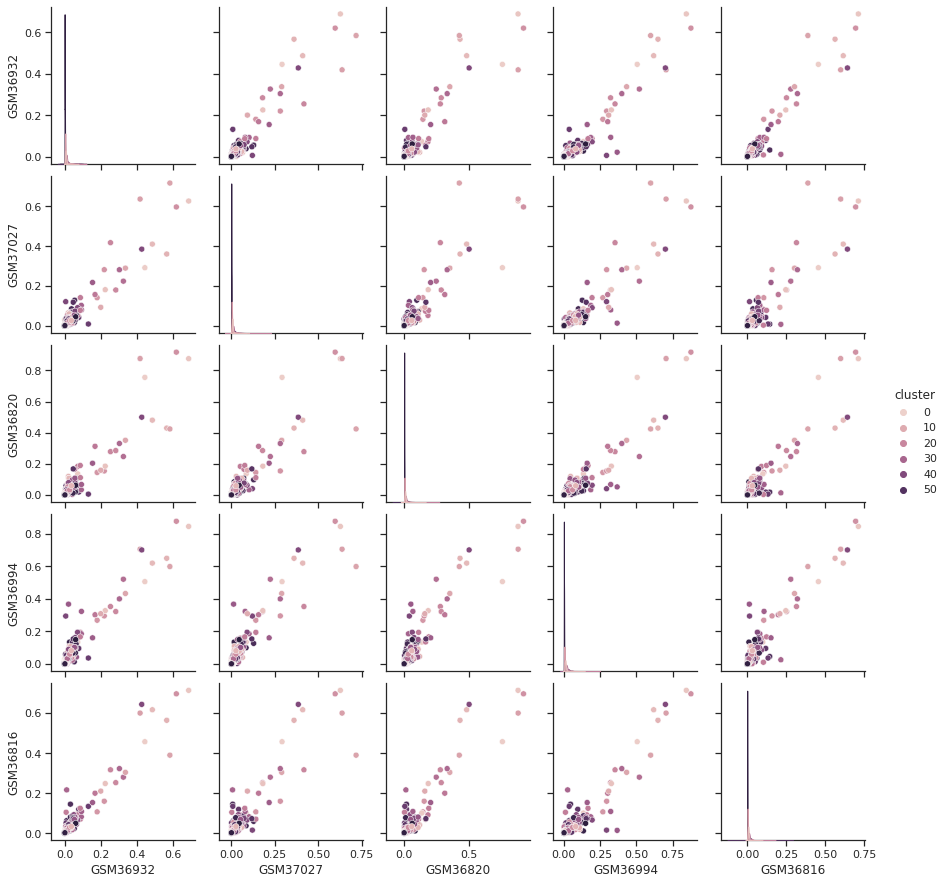

In [11]:
# Make a scatterplot matrix using those features.
sns.set_theme(style="ticks")
sns.pairplot(genes[sampledFeatures + ['cluster']], hue="cluster")

## Heirarchical clustering (bottom up, or agglomerative)

Here, we create a dendrogram. This example uses "nearest centroid" (ward) as the linkage criteria, though others are available.

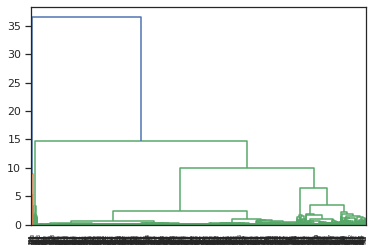

In [13]:
links = linkage(genes.drop(columns=['cluster', 'ID_REF']), 'ward')
dn = dendrogram(links)